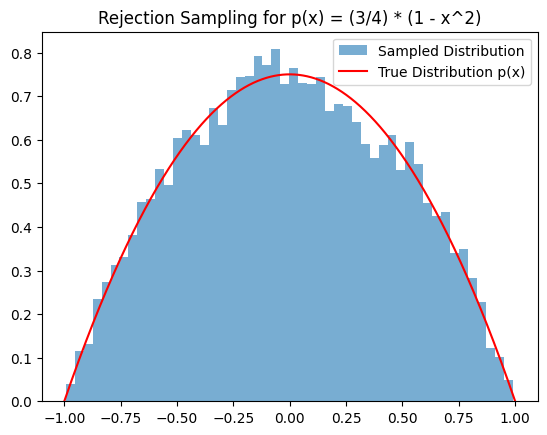

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution p(x) = (3/4) * (1 - x^2)
def target_distribution(x):
    return (3/4) * (1 - x**2) if -1 <= x <= 1 else 0

# Proposal distribution q(x) is U(-1, 1), uniform distribution
def proposal_distribution():
    return np.random.uniform(-1, 1)

# Choose M such that p(x) <= M * q(x) always holds
M = 3/2  # Since q(x) = 1/2 (in the interval [-1,1]), choose M = 3/2 to ensure p(x) <= M * q(x)

# Perform rejection sampling
N = 10000  # Generate 10000 samples
samples = []
while len(samples) < N:
    x = proposal_distribution()  # Sample from q(x)
    u = np.random.uniform(0, 1)  # Sample u ~ U(0,1)
    if u < target_distribution(x) / (M * (1/2)):  # Calculate acceptance rate
        samples.append(x)

# Plot the results
x_vals = np.linspace(-1, 1, 1000)
p_vals = [target_distribution(x) for x in x_vals]

plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Distribution")
plt.plot(x_vals, p_vals, 'r-', label="True Distribution p(x)")
plt.legend()
plt.title("Rejection Sampling for p(x) = (3/4) * (1 - x^2)")
plt.show()
